# Домашняя работа №2

In [1]:
import numpy as np
from scipy.optimize import approx_fprime

### Задание 1

Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$


**Решение "на бумажке":**

$f'(x) = (sin^2(2x+1))' = 2sin(2x+1)(sin(2x+1))' = 2sin(2x+1)cos(2x+1)(2x+1)' = 2sin(2x+1)cos(2x+1)2 = 2sin2(2x+1) = 2sin(4x+2)$  

$f''(x) = (2sin(4x+2))' = 2(sin(4x+2))' = 2cos(4x+2)(4x+2)' = 2cos(4x+2)4 = 8cos(4x+2)$

In [2]:
# Находим первую производную

from sympy import *
x = symbols('x')
deriv1 = diff(pow(sin(2*x+1), 2), x)
deriv1

4*sin(2*x + 1)*cos(2*x + 1)

Поскольку  
$2sinx\cdot cosx = sin2x$, то  
$2sin(2x+1)cos(2x+1) = sin2(2x+1)$, значит,  
$4sin(2x+1)cos(2x+1)$ = $2sin2(2x+1) = 2sin(4x+2)$, что также соответствует решению "на бумажке"

In [3]:
# Находим вторую производную

x = symbols('x')
deriv2 = diff(deriv1, x)
deriv2

-8*sin(2*x + 1)**2 + 8*cos(2*x + 1)**2

Поскольку  
$cos^2x - sin^2x = cos2x$, то  
$-8sin^2(2x + 1) + 8cos^2(2x + 1) = 8cos2(2x + 1) = 8cos(4x + 2)$, что также соответствует решению "на бумажке"

In [4]:
# Или так

x = symbols('x')
deriv3 = diff(2*sin(4*x+2), x)
deriv3

8*cos(4*x + 2)

### Задание 2: 
Посчитайте частные производные функции в точкe
(на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

**Решение "на бумажке"**  

Считаем аргумент y постоянным:  
$f'_{x}(x,y) = 4xy^3 -\displaystyle \frac{1}{x^2} + y^2$  
Находим частную производную в точке (1, 2):  
$f'_{x}(1,2) = 4\cdot1\cdot2^3 -\displaystyle \frac{1}{1^2} + 2^2 = 35$  

Считаем аргумент x постоянным:  
$f'_{y}(x,y) = 6x^2y^2 + 2xy$  
Находим частную производную в точке (1, 2):  
$f'_{y}(1,2) = 6\cdot1^2\cdot2^2 + 2\cdot1\cdot2 = 28$  

$grad_f(1,2) = (35, 28)$

In [5]:
def func(x, c0, c1, c2):
    "Coordinate vector `x` should be an array of size two."
    return c0 * x[0]**2 * x[1]**3 + c1 / x[0] + c2 * x[1]**2 * x[0]

In [6]:
# Задаем точку
x = np.array([1., 2.])
# Задаем коэффициенты одночленов
c0, c1, c2 = (2, 1, 1)
eps = np.sqrt(np.finfo(float).eps)
approx_fprime(x, func, [eps, eps], c0, c1, c2)

array([35.00000024, 28.00000024])

In [7]:
# Еще один вариант
# from sympy import *
# x, y = symbols('x y')
# der_x = diff(2*x**2*y**3 + 1/x + y**2*x + 7, x)
# der_y = diff(2*x**2*y**3 + 1/x + y**2*x + 7, y)

In [8]:
# der_x

In [9]:
# der_y

### Задание 3

Найти точки минимума в следующих данных (колонка height):

In [10]:
import pandas as pd
data = pd.read_csv('data/video.csv')
data.head()

,sec,x1,y1,x2,y2,height
0,0,875,1411,1008,1835,414
1,1,883,1377,1057,1873,417
2,2,862,1397,1066,1872,417
3,3,878,1394,1046,1875,417
4,4,910,1378,1070,1866,417


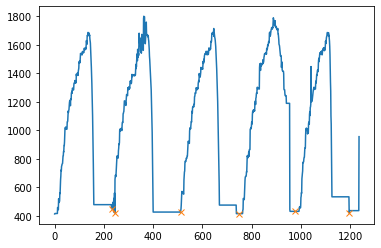

In [11]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(-data.height, prominence=1, width=20)
plt.plot(data.height)
plt.plot(peaks, data.height[peaks], "x")
plt.show()